<a id = 'Introduction'><a/>
    
    INTRODUCTION:
    
    The project aims to answer the following questions:
    Does  the budget of the movie affect its popularity?
    How is the revenue related to the budget? popularity? vote count?
    Which genre has the highest budget? revenue? popularity? 
    What is the relationship between averange vote and popularity?
    Which production companies have the highest budget and revenue?
    
    


<a id = 'Dataset'><a/>
    
    DATASET DESCRIPTION
    
    The tmdb-movies dataset is used in this project.
    The dataset is a CSV (comma separated value) file with data on movies released from 1962 to 2015
    The data includes IDs, popularity, cast, production companies, runtime, websites, directors, etc.

In [77]:
#import necessary packages
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sbn
%matplotlib inline

Reading the TMDB dataset using pandas.read_csv('filename.csv') and showing the first 5 rows using df.heaf()

In [78]:
#using pandas to read the csv file
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


Get the shape of the dataframe


In [79]:
#get the shape of the dataframe
df.shape

(10866, 21)

Check the information about Null values in each column, also datatypes

In [80]:
#check the types and the number of non null values in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

Get statistics from the data, i.e mean, std, median, etc., for each column

In [81]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


Finding null values for each column

In [82]:
#sums all null values in each column
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

Finding duplicates

In [83]:
sum(df.duplicated())


1

See basic histograph distributions 

Here, we are checking the skewness of the different kind of data in each columns

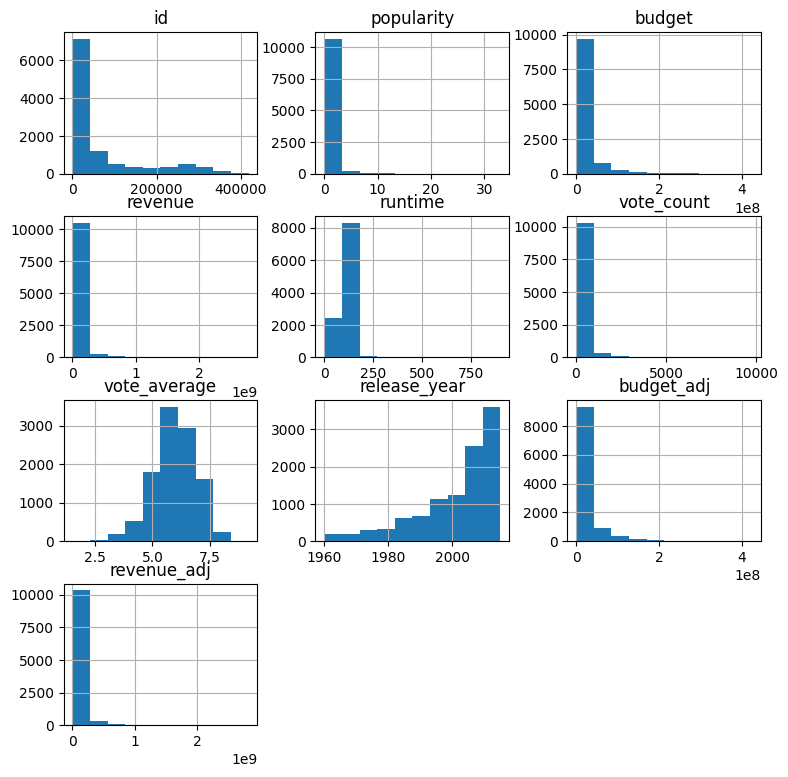

In [84]:
df.hist(figsize = (9,9));

It can be observed that vote has a close to normal distribution
More movies are released each year in recent times, almost exponentially
Revenue and budget are skewed to the left

Let us plot the number of movies released in each year and see how all other columns change with each year. This should give a general trend on how we can predict the future releases per year, although there are many variables to consider so such a prediction may not be as accurate. A machine Learning model could prove more accurate

In [85]:
movies_in_a_year = df.groupby("release_year").mean()
movies_in_a_year.head()

/var/folders/33/05xv_7c529v7tfzv6r8j9t4h0000gn/T/ipykernel_41642/148800811.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  movies_in_a_year = df.groupby("release_year").mean()


,id,popularity,budget,revenue,runtime,vote_count,vote_average,budget_adj,revenue_adj
release_year,,,,,,,,,
1960,15715.281250,0.458932,6.892796e+05,4.531406e+06,110.656250,77.531250,6.325000,5.082036e+06,3.340991e+07
1961,18657.000000,0.422827,1.488290e+06,1.089420e+07,119.419355,77.580645,6.374194,1.085687e+07,7.947167e+07
1962,17001.062500,0.454783,1.710066e+06,6.736870e+06,124.343750,74.750000,6.343750,1.232693e+07,4.856238e+07
1963,16556.000000,0.502706,2.156809e+06,5.511911e+06,111.323529,82.823529,6.329412,1.535687e+07,3.924580e+07
1964,17379.571429,0.412428,9.400753e+05,8.118614e+06,109.214286,74.690476,6.211905,6.608980e+06,5.707603e+07


In [86]:
def plot_columns(col):
    '''
    this function plots the mean values in each column such that the output is different for each column
    
    '''
    # plot
    movies_in_a_year[col].plot (kind="barh", figsize= (15,10));
    # Add title and format it
    plt.title (f'Average of {col} by year'.title(), fontsize = 14, weight = "bold")
    # Add × label and format it
    plt.xlabel (col.title(), fontsize = 10, weight = "bold")
    # Add y label and format it
    plt.ylabel('Year'.title(), fontsize = 10, weight = "bold")

Let us define a function that plots the revenue, budget, popularity, vote average, vote count of the movies released in each year. Again, this has limits should we want to see the future performance

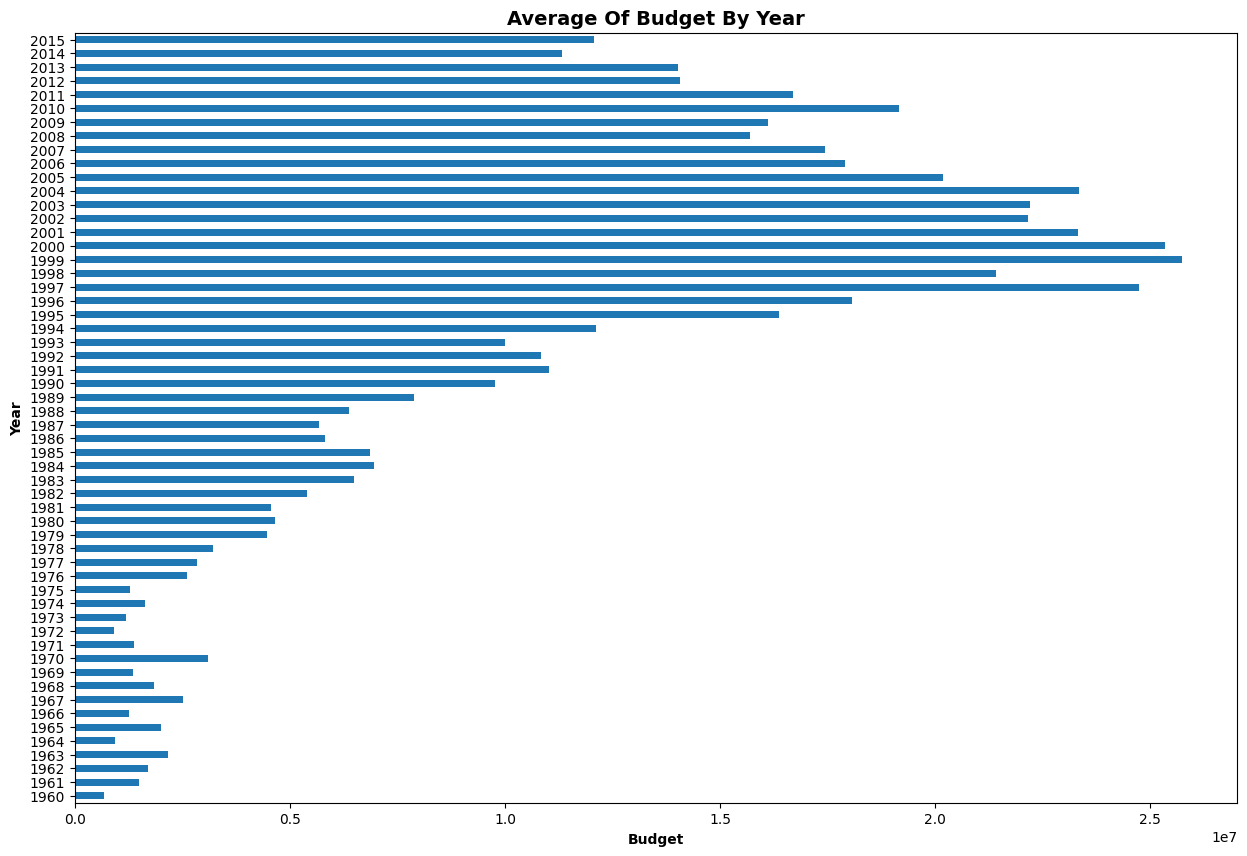

In [87]:
plot_columns('budget')

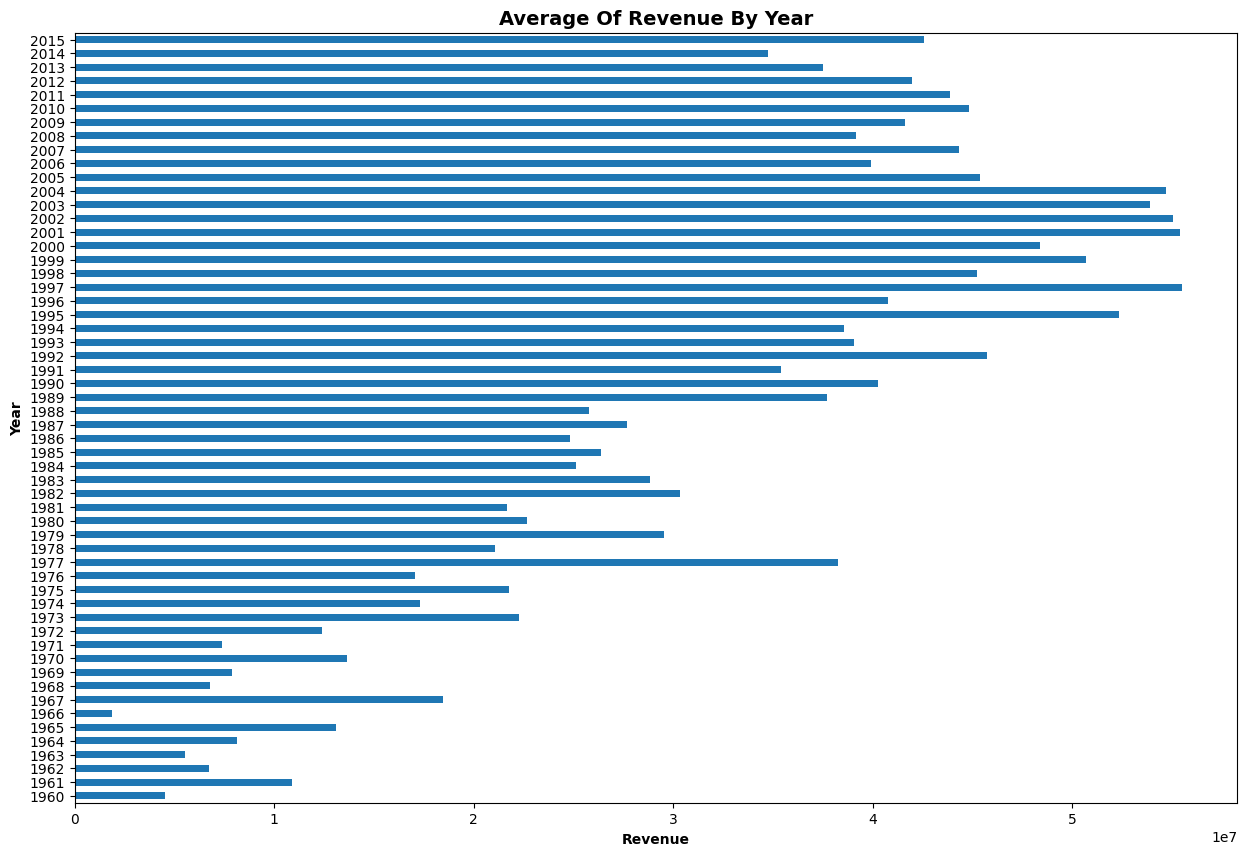

In [88]:
plot_columns('revenue')

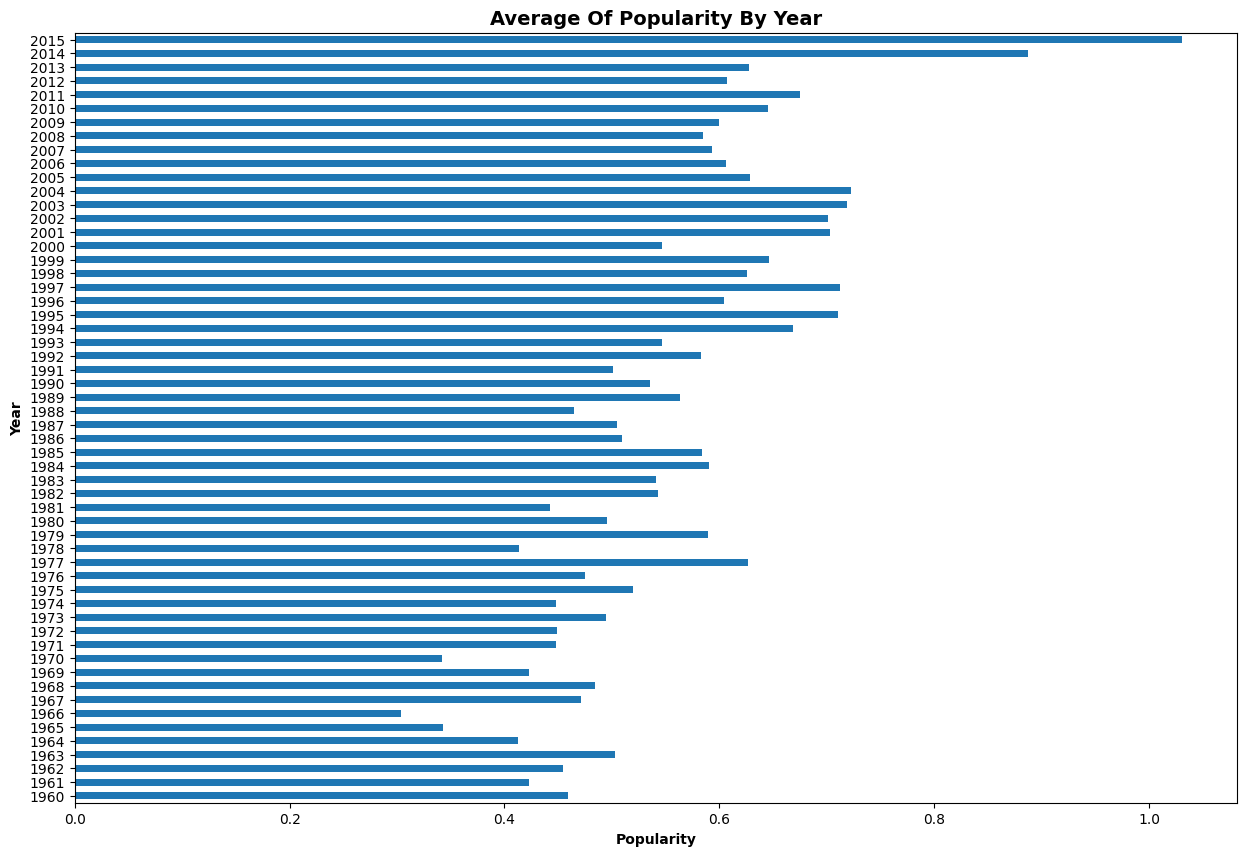

In [89]:
plot_columns('popularity')

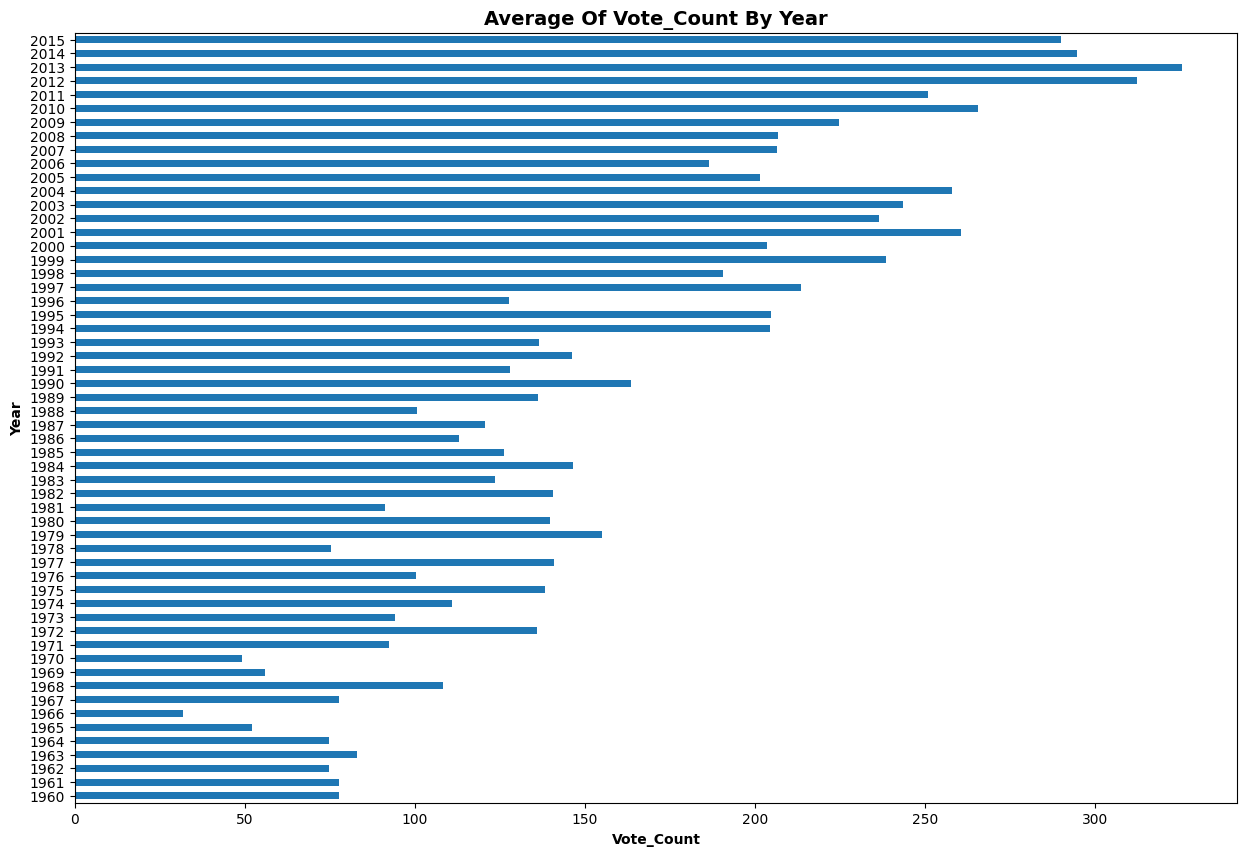

In [90]:
plot_columns('vote_count')

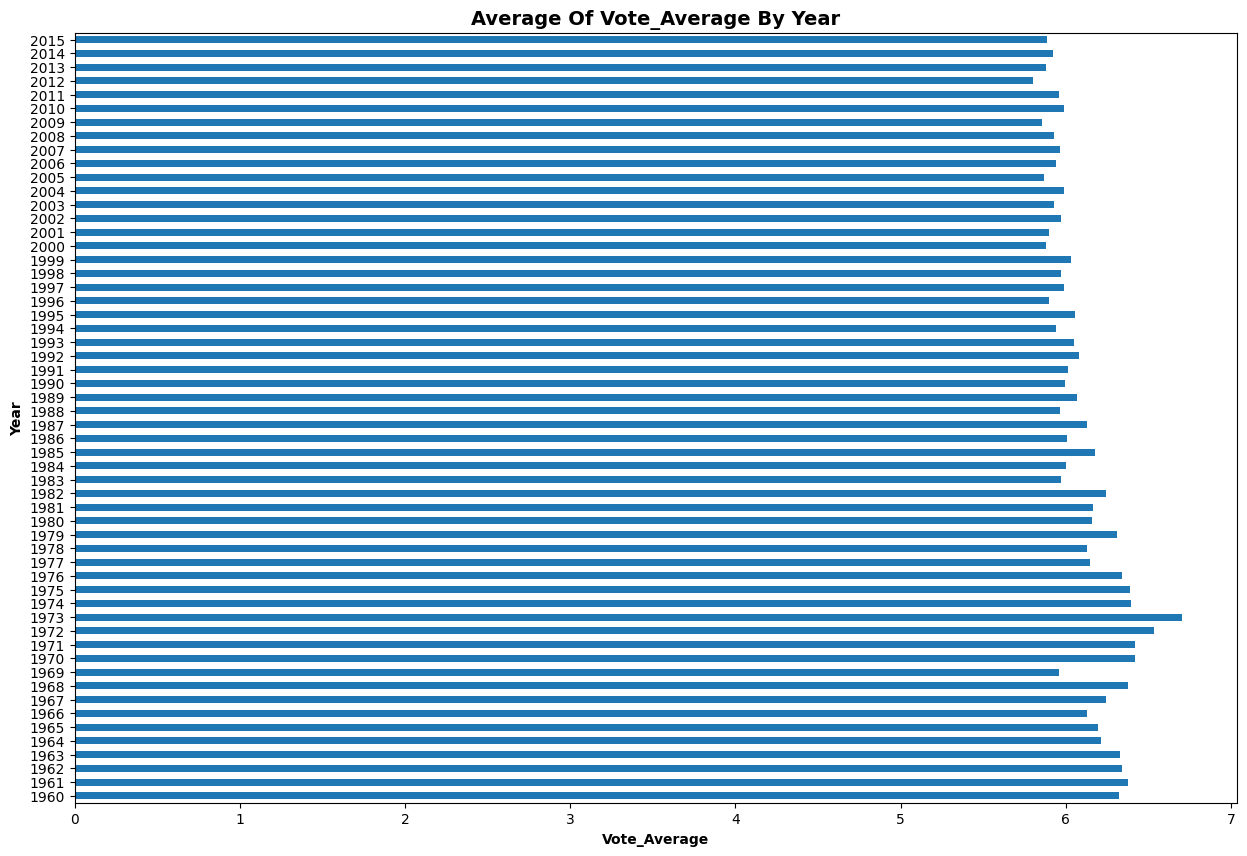

In [91]:
plot_columns('vote_average')

Grouping by genres and assesing which genres are popular

In [92]:
# split genres string, at |, explode the list to rows
genres_df = df.assign(genres=df['genres'].str.split('|')).explode('genres')
genres_df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Adventure,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Science Fiction,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


Let us now observe average popularity of each genre over the years and see which genres have performed well relative to others


In [93]:
# group exploded dataframe by genres, get average popularity
genres_df.groupby('genres').popularity.mean()

genres
Action             0.926136
Adventure          1.154259
Animation          0.852182
Comedy             0.592607
Crime              0.744821
Documentary        0.181432
Drama              0.591496
Family             0.786668
Fantasy            0.992840
Foreign            0.191496
History            0.575936
Horror             0.465357
Music              0.487321
Mystery            0.690012
Romance            0.592082
Science Fiction    1.001218
TV Movie           0.270896
Thriller           0.741513
War                0.727683
Western            0.590615
Name: popularity, dtype: float64

From this analysis, it can be obverved that Adventure, Science Fictiom, Action, and Animation have done really well from 1962, while Foreign, TV movie, and documentary haven't been that popular

Let us group the genres by year starting from 2012 and plot that info to see which genre was released most in each year specified.

In [94]:
genres_year = genres_df.query(" release_year >= {} ".format(2012)).groupby(["release_year","genres"]).count()
genres_year = genres_year.iloc[:,1]
genres_year

release_year  genres         
2012          Action              99
              Adventure           50
              Animation           40
              Comedy             175
              Crime               54
                                ... 
2015          Science Fiction     85
              TV Movie            20
              Thriller           171
              War                  9
              Western              6
Name: imdb_id, Length: 77, dtype: int64

Let us observe which genres have been typically doing well

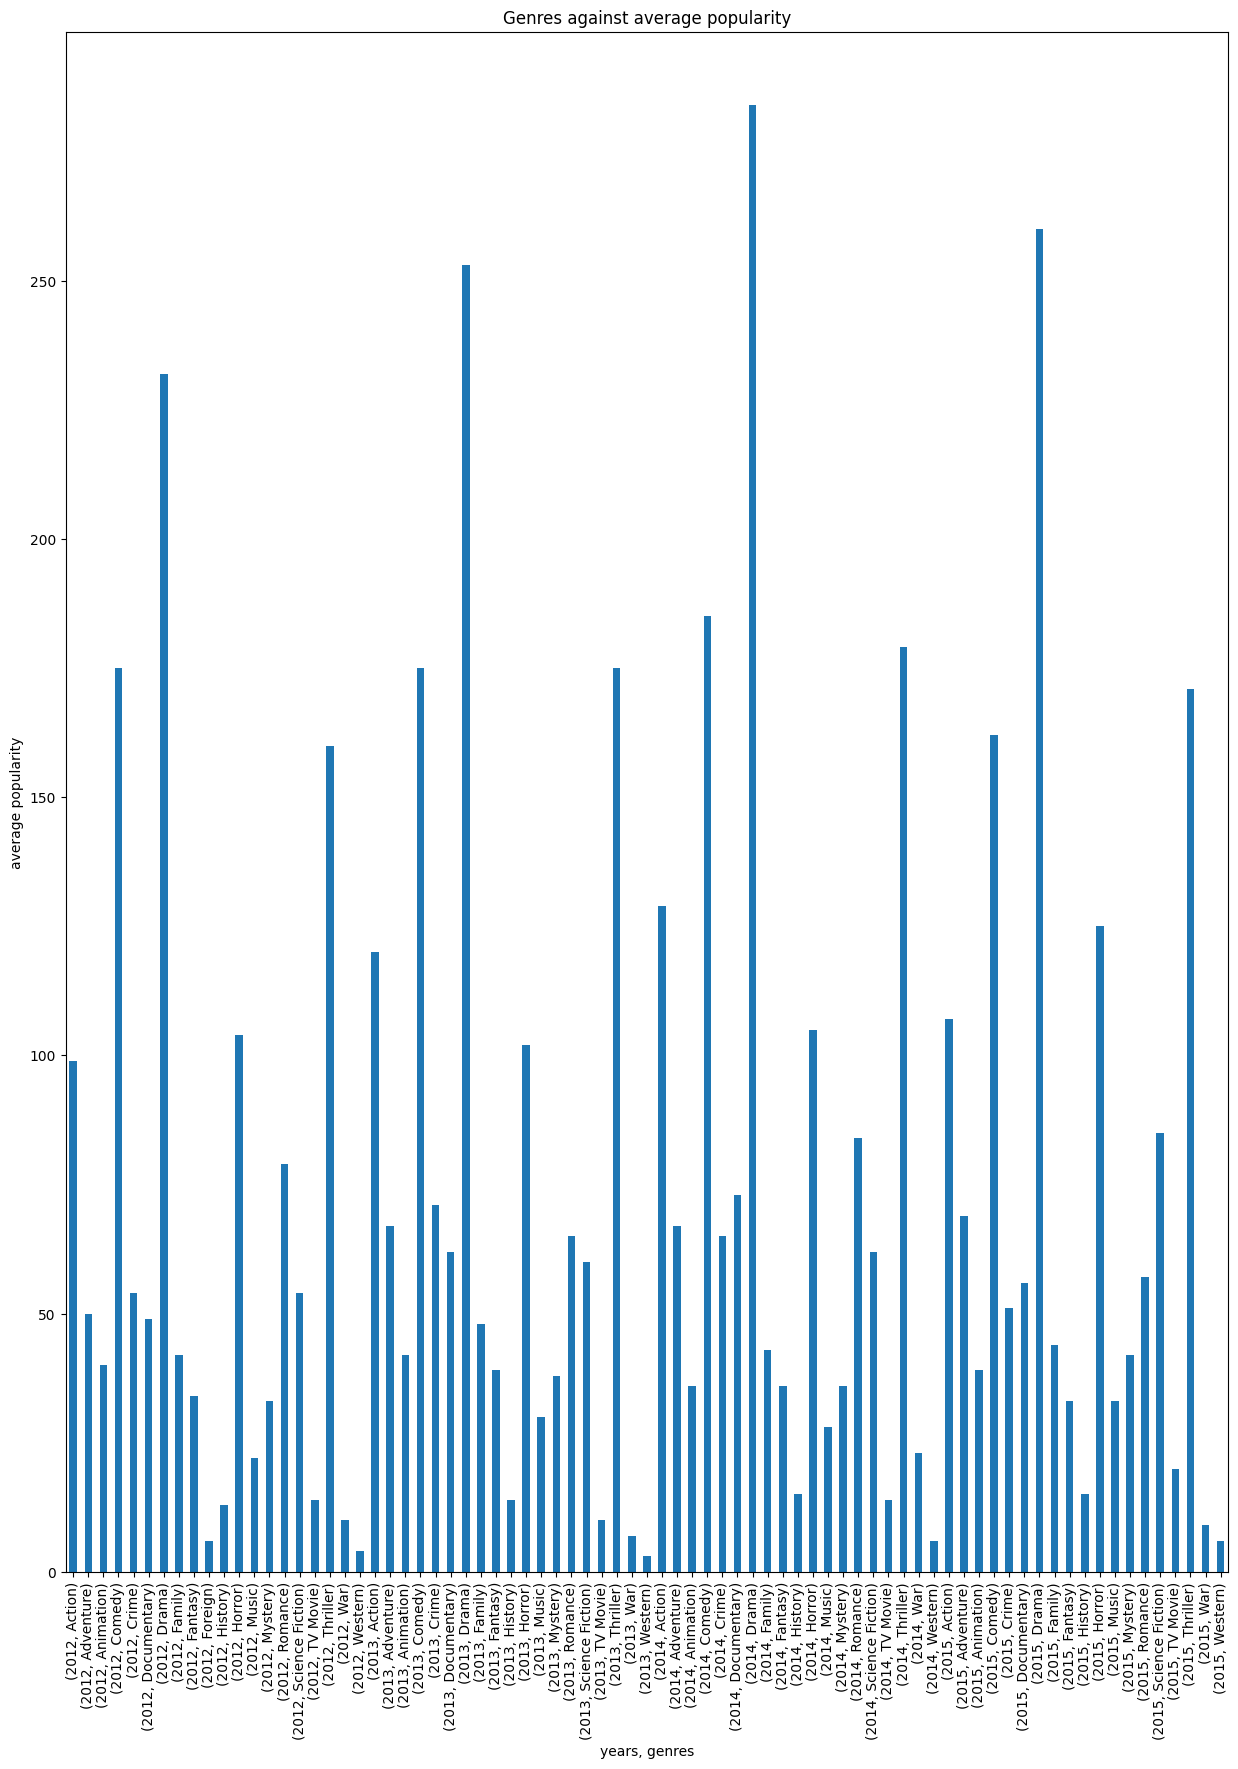

In [95]:
genres_year.plot(kind="bar", figsize=(15,20));
plt.title('Genres against average popularity');
plt.xlabel('years, genres');
plt.ylabel('average popularity');

Drama, Comedy, and Thriller have been doing exceptionally well since 2012


Droping the Nan values to ensure the analysis only captures Non-Nan Values, and is well representative of them

In [96]:
#drop all nan values and save that in a new data frame
df = df.dropna(inplace = False)
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


Check if there is any remaining Null or Nan Values

In [97]:
df.isnull().sum()
        

id                      0
imdb_id                 0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
homepage                0
director                0
tagline                 0
keywords                0
overview                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

No nan values remaining in the columns

Let us define a function for checking which column or columns affect a movies popularity. Function loops through all numerical columns and plots them against popularity.

In [98]:
def scatter_popularity():
    cols = ['budget', 'revenue', 'runtime','vote_count','vote_average']
    for col in cols:

        df.plot(kind = 'scatter', x = col, y = 'popularity');


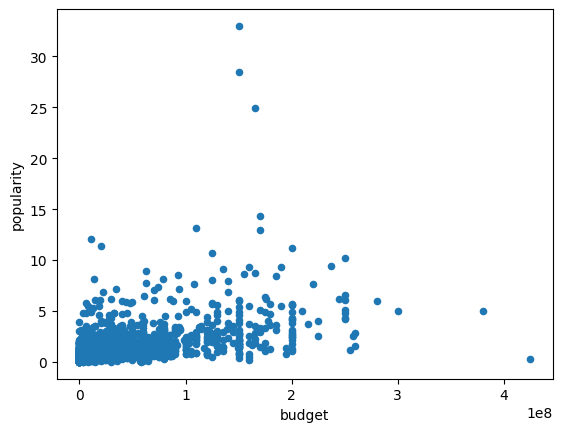

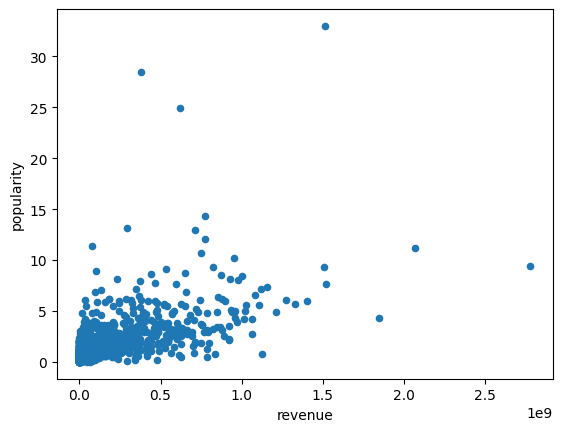

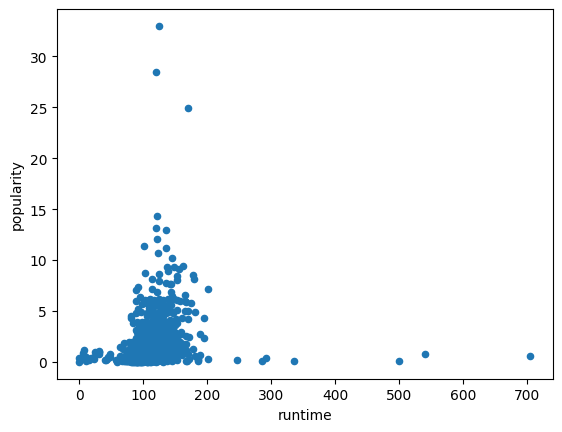

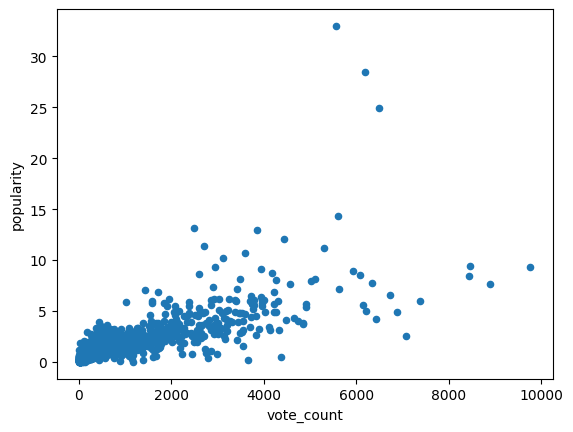

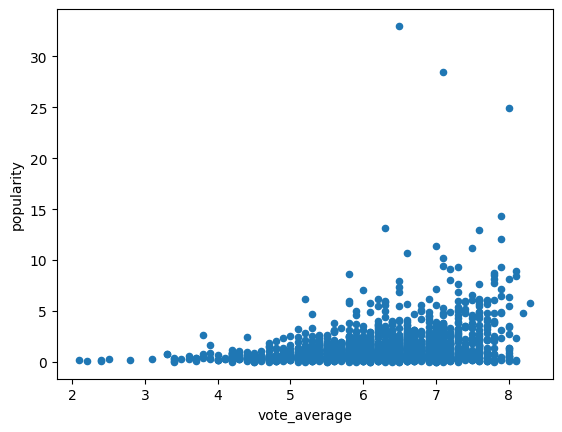

In [99]:
scatter_popularity()

Popularity is positively correlated to vote count, vote average, revenue, budget, and the last two do have some anomalies as budget 
and revenue alone cannot fully show how popular a movie will be. Run time average is about 120 mins for maximum popularity. This shows that when making a prediction, all factors for maximum popularity should be considered, i.e 
large budget, more revenue, runtime of 120 mins


Plot the economics of each movie, i.e budget vs revenue

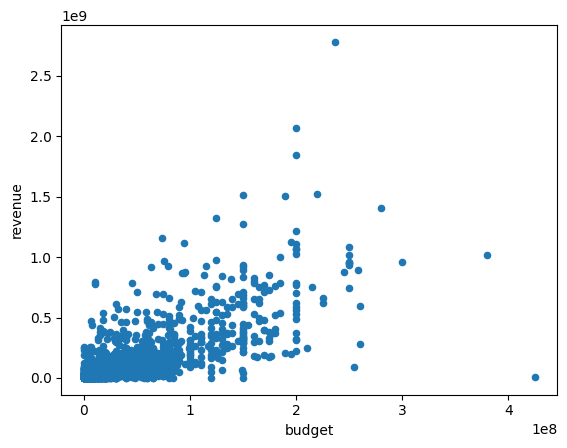

In [100]:
df.plot(kind = 'scatter', x = 'budget', y = 'revenue');

From the above scatter plot,  clearly the larger the budget, the more the revenue but there are some outliers which suggests that it's not always the case tht the largest budget can result in the biggest revenue


Get the title of the movie with a) Maximum revenue, b) biggest budget, c) minimum revenue, d) smallest budget, e) most vote count, f) highest average vote, g) highest popularity, h) maximum runtime, i) minimmum runtime

In [101]:
#maximum revenue movie
df[df.revenue == df['revenue'].max()]


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1386,19995,tt0499549,9.432768,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,http://www.avatarmovie.com/,James Cameron,Enter the World of Pandora.,...,"In the 22nd century, a paraplegic Marine is di...",162,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,12/10/09,8458,7.1,2009,2.408869e+08,2.827124e+09


Not surprised here, even the new Avatar doing quite well

In [102]:
#maximum budget movie
df[df.budget == df['budget'].max()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2244,46528,tt1032751,0.25054,425000000,11087569,The Warrior's Way,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,http://www.iamrogue.com/thewarriorsway,Sngmoo Lee,Assassin. Hero. Legend.,...,An Asian assassin (Dong-gun Jang) is forced to...,100,Adventure|Fantasy|Action|Western|Thriller,Boram Entertainment Inc.,12/2/10,74,6.4,2010,425000000.0,11087569.0


The Warrior's Way has the maximum budget

In [103]:
#minimum revenue
df[df.revenue == df['revenue'].min()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
67,334074,tt3247714,2.331636,20000000,0,Survivor,Pierce Brosnan|Milla Jovovich|Dylan McDermott|...,http://survivormovie.com/,James McTeigue,His Next Target is Now Hunting Him,...,A Foreign Service Officer in London tries to p...,96,Crime|Thriller|Action,Nu Image Films|Winkler Films|Millennium Films|...,5/21/15,280,5.4,2015,1.839999e+07,0.0
75,308369,tt2582496,2.141506,0,0,Me and Earl and the Dying Girl,Thomas Mann|RJ Cyler|Olivia Cooke|Connie Britt...,http://www.foxsearchlight.com/meandearlandthed...,Alfonso Gomez-Rejon,A Little Friendship Never Killed Anyone.,...,Greg is coasting through senior year of high s...,105,Comedy|Drama,Indian Paintbrush,6/12/15,569,7.7,2015,0.000000e+00,0.0
143,378373,tt3532278,1.128081,0,0,Brothers of the Wind,Manuel Camacho|Jean Reno|Tobias Moretti|Eva Kuen,http://www.terramater.at/cinema/brothers-of-th...,Gerado Olivares|Otmar Penker,Sometimes a friendship sets you free,...,The way of the eagle is to raise two chicks. T...,98,Adventure|Drama|Family,Terra Mater Factual Studios,12/24/15,11,7.5,2015,0.000000e+00,0.0
159,251516,tt3472226,0.953046,630019,0,Kung Fury,David Sandberg|Jorma Taccone|Leopold Nilsson|A...,http://www.kungfury.com/,David Sandberg,It takes a cop from the future to fight an ene...,...,"During an unfortunate series of events, a frie...",31,Action|Comedy|Science Fiction|Fantasy,Laser Unicorns,5/28/15,487,7.7,2015,5.796172e+05,0.0
174,342474,tt3289712,0.861179,0,0,Jenny's Wedding,Katherine Heigl|Tom Wilkinson|Alexis Bledel|Gr...,https://www.facebook.com/jennysweddingmovie,Mary Agnes Donoghue,Family is worth fighting for.,...,Jenny Farrell is getting married. But how will...,94,Comedy|Drama,MM Productions|Merced Media Partners|PalmStar ...,7/31/15,92,5.2,2015,0.000000e+00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10238,531,tt0108598,0.996113,0,0,The Wrong Trousers,Peter Sallis,http://www.wallaceandgromit.com/films/the-wron...,Nick Park,Winner of the 1993 Academy Award for Best Anim...,...,Gromit finds himself being pushed out of his r...,30,Animation|Comedy|Family,Aardman Animations,12/17/93,146,7.4,1993,0.000000e+00,0.0
10328,31578,tt0106449,0.238862,0,0,Body Bags,John Carpenter|Robert Carradine|Alex Datcher|D...,http://www.theofficialjohncarpenter.com/body-b...,John Carpenter|Tobe Hooper|Larry Sulkis,Zip yourself in tight!,...,"Three tales are told, each one increasingly te...",94,Horror,Showtime Networks,8/7/93,21,5.3,1993,0.000000e+00,0.0
10372,13063,tt0115819,0.181665,125000,0,Cannibal! The Musical,Trey Parker|Dian Bachar|Ian Hardin|Jon Hegel|M...,http://www.cannibalthemusical.net/index.shtml,Trey Parker,All Singing! All Dancing! All Flesh Eating!,...,Heading through Colorado Territory in search o...,97,Comedy|History|Horror,Avenging Conscience|Troma Entertainment|Cannib...,10/1/93,19,6.7,1993,1.886837e+05,0.0
10567,20537,tt0090798,0.227370,0,0,Caravaggio,Nigel Terry|Tilda Swinton|Sean Bean|Robbie Col...,http://www.zeitgeistfilms.com/film.php?directo...,Derek Jarman,His passion came with a price.,...,As influential Italian artist Caravaggio dies ...,93,Drama|History,British Film Institute (BFI),8/29/86,13,4.7,1986,0.000000e+00,0.0


Hmm, movie with zero revenue?

In [104]:
#minimum budget movie
df[df.budget == df['budget'].min()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
30,280996,tt3168230,3.927333,0,29355203,Mr. Holmes,Ian McKellen|Milo Parker|Laura Linney|Hattie M...,http://www.mrholmesfilm.com/,Bill Condon,The man behind the myth,...,"The story is set in 1947, following a long-ret...",103,Mystery|Drama,BBC Films|See-Saw Films|FilmNation Entertainme...,6/19/15,425,6.4,2015,0.0,2.700677e+07
75,308369,tt2582496,2.141506,0,0,Me and Earl and the Dying Girl,Thomas Mann|RJ Cyler|Olivia Cooke|Connie Britt...,http://www.foxsearchlight.com/meandearlandthed...,Alfonso Gomez-Rejon,A Little Friendship Never Killed Anyone.,...,Greg is coasting through senior year of high s...,105,Comedy|Drama,Indian Paintbrush,6/12/15,569,7.7,2015,0.0,0.000000e+00
88,301875,tt3289728,1.959765,0,2000000,Equals,Kristen Stewart|Nicholas Hoult|Guy Pearce|Jack...,http://equals-the-movie.com/,Drake Doremus,Find your equal.,...,A futuristic love story set in a world where e...,101,Drama|Romance|Science Fiction,Scott Free Productions|Infinite Frameworks Stu...,9/4/15,135,5.6,2015,0.0,1.839999e+06
95,258509,tt2974918,1.841779,0,233755553,Alvin and the Chipmunks: The Road Chip,Jason Lee|Justin Long|Bella Thorne|Matthew Gra...,http://www.foxmovies.com/movies/alvin-and-the-...,Walt Becker,Fast & furry-ous,...,"Through a series of misunderstandings, Alvin, ...",92,Adventure|Animation|Comedy|Family,Regency Enterprises|Fox 2000 Pictures|Sunswept...,12/17/15,278,5.7,2015,0.0,2.150550e+08
132,263109,tt2872750,1.253580,0,59700000,Shaun the Sheep Movie,Justin Fletcher|Omid Djalili|Richard Webber|Ka...,http://www.shaunthesheep.com/,Mark Burton|Richard Starzack,Moving on to Pastures New.,...,When Shaun decides to take the day off and hav...,85,Family|Animation|Comedy|Adventure,Aardman Animations|Studio Canal|Anton Capital ...,2/5/15,340,6.9,2015,0.0,5.492398e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10328,31578,tt0106449,0.238862,0,0,Body Bags,John Carpenter|Robert Carradine|Alex Datcher|D...,http://www.theofficialjohncarpenter.com/body-b...,John Carpenter|Tobe Hooper|Larry Sulkis,Zip yourself in tight!,...,"Three tales are told, each one increasingly te...",94,Horror,Showtime Networks,8/7/93,21,5.3,1993,0.0,0.000000e+00
10567,20537,tt0090798,0.227370,0,0,Caravaggio,Nigel Terry|Tilda Swinton|Sean Bean|Robbie Col...,http://www.zeitgeistfilms.com/film.php?directo...,Derek Jarman,His passion came with a price.,...,As influential Italian artist Caravaggio dies ...,93,Drama|History,British Film Institute (BFI),8/29/86,13,4.7,1986,0.0,0.000000e+00
10657,5722,tt0065466,0.374514,0,0,Beyond the Valley of the Dolls,Dolly Read|Cynthia Myers|Marcia McBroom|John L...,http://www.beyondthevalleyofthedolls.com/home....,Russ Meyer,This Is Not A Sequel. There Has Never Been Any...,...,A hip and happenin' all girl rock group head t...,109,Comedy|Drama|Thriller,Twentieth Century Fox Film Corporation,7/17/70,19,6.2,1970,0.0,0.000000e+00
10817,13963,tt0077838,0.064029,0,321952,The Last Waltz,Robbie Robertson|Rick Danko|Levon Helm|Richard...,http://www.mgm.com/#/our-titles/1092/The-Last-...,Martin Scorsese,It Started as a Concert. It Became a Celebration.,...,Martin Scorsese's rockumentary intertwines foo...,117,Documentary|Music,FM Productions|Last Waltz Inc.,5/1/78,33,8.0,1978,0.0,1.076189e+06


Zero budget? Perhaps the dataset has some missing information on budget

In [105]:
#maximum popularity score
df[df.popularity == df['popularity'].max()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


Not surprised that Jurassic World is the most popular movie

In [106]:
df[df.popularity == df['popularity'].min()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
6080,174323,tt2429074,0.00062,0,0,G.B.F.,Michael J. Willett|Paul Iacono|Sasha Pieterse|...,https://www.facebook.com/GBFmovie,Darren Stein,Being out has never been so in.,...,The bitter fight for supremacy between the thr...,92,Comedy,School Pictures|Parting Shots Media|Logolite E...,10/20/13,82,6.1,2013,0.0,0.0


Even I did not know what G.B.F was all about

In [107]:
df[df.vote_count == df['vote_count'].max()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1919,27205,tt1375666,9.363643,160000000,825500000,Inception,Leonardo DiCaprio|Joseph Gordon-Levitt|Ellen P...,http://inceptionmovie.warnerbros.com/,Christopher Nolan,Your mind is the scene of the crime.,...,"Cobb, a skilled thief who commits corporate es...",148,Action|Thriller|Science Fiction|Mystery|Adventure,Legendary Pictures|Warner Bros.|Syncopy,7/14/10,9767,7.9,2010,160000000.0,825500000.0


Inception has the maximum vote count 

In [108]:
df[df.vote_count == df['vote_count'].min()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1014,293894,tt3451956,0.512023,0,0,Viking: The Berserkers,Sol Heras|Anthony Baines|Kezia Burrows|Nick Co...,https://www.facebook.com/TheBerserkersMovie,Antony Smith,The Viking Hunger Games!,...,The Hunger Games heads back to the Dark Ages w...,89,Thriller|Horror,Lindisfarne SPV1,9/15/14,10,5.0,2014,0.000000e+00,0.000000e+00
1120,279914,tt2326574,0.376205,12000000,0,The Identical,Ashley Judd|Ray Liotta|Amanda Crew|Seth Green|...,http://theidenticalmovie.com/,Dustin Marcellino,"If He is in your dream, nothing can stand agai...",...,"During the Great Depression, identical twins a...",107,Music|Drama,City of Peace Films|Identical Production Company,9/5/14,10,5.0,2014,1.105309e+07,0.000000e+00
1560,29483,tt1209377,0.534927,4300000,0,Beautiful Kate,Ben Mendelsohn|Rachel Griffiths|Sophie Lowe|Br...,http://www.beautifulkatemovie.com.au/,Rachel Ward,The past is always present.,...,Ned Kendall is asked to return to the remote a...,90,Drama|Foreign|Mystery,Beautiful Kate Productions|Doll Australia|New ...,6/13/09,10,6.2,2009,4.370522e+06,0.000000e+00
2188,50090,tt1535491,0.146543,0,0,ì˜í˜•ì œ,Kang-ho Song|Kang Dong-won|Kyeong-min Go|Su-ho Ha,http://www.gikyodai.com/,Jang Hoon,A North Korean spy and a former South Korean a...,...,Six years ago a mysterious shooting takes plac...,116,Drama|Thriller|Foreign,Showbox,2/4/10,10,6.3,2010,0.000000e+00,0.000000e+00
2319,55246,tt1341341,0.168177,0,22270,Ceremony,Uma Thurman|Michael Angarano|Lee Pace|Rebecca ...,http://www.ceremonyfilm.com/,Max Winkler,He's the love of her life. She just doesn't kn...,...,Sam Davis convinces his former best friend to ...,89,Comedy|Romance,NALA Films,10/8/10,10,5.7,2010,0.000000e+00,2.227000e+04
2349,70862,tt1307861,0.123158,0,0,American Grindhouse,Robert Forster|Allison Anders|John Landis|Kim ...,http://www.americangrindhouse.com/,Elijah Drenner,Giving Audiences What They Want Since the Dawn...,...,This documentary explores the hidden history o...,80,Documentary|History,Lux Digital Pictures|End Films,3/13/10,10,6.0,2010,0.000000e+00,0.000000e+00
2358,59110,tt1571409,0.180217,0,0,Parked,Colm Meaney|Colin Morgan|Milka Ahlroth|Stuart ...,http://www.parkedmovie.com/,Darragh Byrne,Sometimes the person you least expect can help...,...,Fred Daly returns to Ireland with nowhere to l...,94,Drama,BÃ³rd ScannÃ¡n na hÃ‰ireann|Helsinki Filmi Oy|...,9/1/10,10,5.6,2010,0.000000e+00,0.000000e+00
2375,51764,tt1426320,0.068941,0,5980,BearCity,Joe Conti|Gerald McCullouch|Stephen Guarino|Al...,http://www.bearcitythemovie.com,Douglas Langway,Romance can be hairy,...,"Set in New York's gay ""bear"" scene and taking ...",103,Comedy|Romance,TLA Releasing,6/8/10,10,5.5,2010,0.000000e+00,5.980000e+03
3120,15801,tt1133991,0.361308,0,44872,What Doesn't Kill You,Ethan Hawke|Mark Ruffalo|Amanda Peet|Donnie Wa...,http://www.whatdoesntkillyoumovie.com/,Brian Goodman,Everyone has a choice. Every choice has a cons...,...,Two childhood friends from South Boston turn t...,100,Action|Crime|Drama,Yari Film Group,12/12/08,10,7.0,2008,0.000000e+00,4.544576e+04
3366,33295,tt1286821,0.005391,0,887029,More Than a Game,LeBron James|Romeo Travis|Sian Cotton|Willie M...,http://www.morethanagamemovie.com/,Kristopher Belman,The incredible true story of LeBron James and ...,...,This documentary follows NBA superstar LeBron ...,105,Documentary|Family,Harvey Mason Media,9/6/08,10,6.4,2008,0.000000e+00,8.983711e+05


Quite a number of movies withv zero vote count

In [109]:
df[df.vote_average == df['vote_average'].max()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
7269,238,tt0068646,5.738034,6000000,245066411,The Godfather,Marlon Brando|Al Pacino|James Caan|Richard S. ...,http://www.thegodfather.com/,Francis Ford Coppola,An offer you can't refuse.,...,"Spanning the years 1945 to 1955, a chronicle o...",175,Drama|Crime,Paramount Pictures|Alfran Productions,3/15/72,3970,8.3,1972,3.128737e+07,1.277914e+09


The Godfather has the maximum vote average

In [110]:
df[df.vote_average == df['vote_average'].min()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
7220,31117,tt0270846,0.157959,0,9109322,Superbabies: Baby Geniuses 2,Jon Voight|Scott Baio|Vanessa Angel|Skyler Sha...,http://www.sonypictures.com/movies/superbabies...,Bob Clark,Meet the new generation of superheroes.,...,"Following on from the plot of the last movie, ...",88,Family|Comedy,Crystal Sky Worldwide|Triumph Films,8/27/04,11,2.1,2004,0.0,1.051621e+07


Superbabies has the minimum vote average

In [111]:
#get the max runtime
df[df.runtime == df['runtime'].max()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2722,331214,tt0185906,0.537593,0,125000000,Band of Brothers,Damian Lewis|Ron Livingston|Frank John Hughes|...,http://www.hbo.com/band-of-brothers,Phil Alden Robinson|Richard Loncraine|Mikael S...,Ordinary men. Extraordinary times.,...,Drawn from interviews with survivors of Easy C...,705,Action|Drama|War,HBO,9/9/01,313,8.0,2001,0.0,1.539360e+08


What a crazy number, 705 minutes for the maximum runtime, movie: Band of Brothers

In [112]:
#min runtime
df[df.runtime == df['runtime'].min()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
334,361931,tt5065822,0.357654,0,0,Ronaldo,Cristiano Ronaldo,http://www.ronaldothefilm.com,Anthony Wonke,Astonishing. Intimate. Definitive.,...,Filmed over 14 months with unprecedented acces...,0,Documentary,"On The Corner Films|We Came, We Saw, We Conque...",11/9/15,80,6.5,2015,0.000000e+00,0.0
1289,286372,tt1791681,0.037459,3250000,0,Treehouse,J. Michael Trautmann|Dana Melanie|Daniel Fredr...,http://www.imdb.com/title/tt1791681/,Michael G. Bartlett,No kids allowed,...,A teenage boy discovers the perpetrators of se...,0,Thriller|Horror|Mystery,Tiberius Film,10/20/14,16,3.4,2014,2.993546e+06,0.0


Well, clearly some information is missing. There can't be a movie with no runtime

Get the movie title and leading actor and store that in a hash table

In [113]:
#get leading actor and name of movie by vectorizing
leading_actor = df['cast'].apply(lambda x: x.split('|')[0])
name_of_movie = df['original_title'].apply(lambda x: x.split('/')[0])

In [114]:
#use the in-built functions dict and zip to create a dictionnary, aka hash map 
movie_actor = dict(zip(name_of_movie,leading_actor))

In [115]:
#show movie title and actor
movie_actor

{'Jurassic World': 'Chris Pratt',
 'Mad Max: Fury Road': 'Tom Hardy',
 'Insurgent': 'Shailene Woodley',
 'Star Wars: The Force Awakens': 'Harrison Ford',
 'Furious 7': 'Vin Diesel',
 'The Revenant': 'Chris Wylde',
 'Terminator Genisys': 'Arnold Schwarzenegger',
 'The Martian': 'Matt Damon',
 'Minions': 'Sandra Bullock',
 'Inside Out': 'Amy Poehler',
 'Spectre': 'Daniel Craig',
 'Jupiter Ascending': 'Mila Kunis',
 'Ex Machina': 'Domhnall Gleeson',
 'Pixels': 'Adam Sandler',
 'Avengers: Age of Ultron': 'Robert Downey Jr.',
 'The Hateful Eight': 'Samuel L. Jackson',
 'Taken 3': 'Liam Neeson',
 'Ant-Man': 'Paul Rudd',
 'The Hunger Games: Mockingjay - Part 2': 'Jennifer Lawrence',
 'Tomorrowland': 'Britt Robertson',
 'San Andreas': 'Dwayne Johnson',
 'Fifty Shades of Grey': 'Dakota Johnson',
 'The Big Short': 'Christian Bale',
 'Mission: Impossible - Rogue Nation': 'Tom Cruise',
 'Kingsman: The Secret Service': 'Taron Egerton',
 'Spotlight': 'Mark Ruffalo',
 'Maze Runner: The Scorch Trials'

Get movie title and leading production company

In [116]:
#do the same for leading production company and movie title
leading_production_co = df['production_companies'].apply(lambda x: x.split('|')[0])
name_of_movie = df['original_title'].apply(lambda x: x.split('/')[0])

In [117]:
movie_prod = dict(zip(name_of_movie,leading_production_co))

In [118]:
movie_prod

{'Jurassic World': 'Universal Studios',
 'Mad Max: Fury Road': 'Village Roadshow Pictures',
 'Insurgent': 'Summit Entertainment',
 'Star Wars: The Force Awakens': 'Lucasfilm',
 'Furious 7': 'Universal Pictures',
 'The Revenant': 'Putrefactory Limited',
 'Terminator Genisys': 'Paramount Pictures',
 'The Martian': 'Twentieth Century Fox Film Corporation',
 'Minions': 'Universal Pictures',
 'Inside Out': 'Walt Disney Pictures',
 'Spectre': 'Columbia Pictures',
 'Jupiter Ascending': 'Village Roadshow Pictures',
 'Ex Machina': 'DNA Films',
 'Pixels': 'Columbia Pictures',
 'Avengers: Age of Ultron': 'Marvel Studios',
 'The Hateful Eight': 'Double Feature Films',
 'Taken 3': 'Twentieth Century Fox Film Corporation',
 'Ant-Man': 'Marvel Studios',
 'The Hunger Games: Mockingjay - Part 2': 'Studio Babelsberg',
 'Tomorrowland': 'Walt Disney Pictures',
 'San Andreas': 'New Line Cinema',
 'Fifty Shades of Grey': 'Focus Features',
 'The Big Short': 'Paramount Pictures',
 'Mission: Impossible - Rogue

Get the top genres by ech year from 2012

In [119]:
famous_genres = ['Comedy','Drama','Horror', 'Action']
trends1 = df.query(" genres in {} &  release_year >= {} ".format(famous_genres,2012)) \
                                .groupby(["genres","release_year"]) \
                                .count()
trends = trends1.iloc[:,1] 
trends

genres  release_year
Action  2014             2
        2015             1
Comedy  2012            10
        2013             5
        2014             7
        2015             6
Drama   2012             8
        2013             7
        2014            14
        2015            13
Horror  2012             1
        2013             3
        2014             4
        2015             3
Name: imdb_id, dtype: int64

Drama is the most popular genre from the data

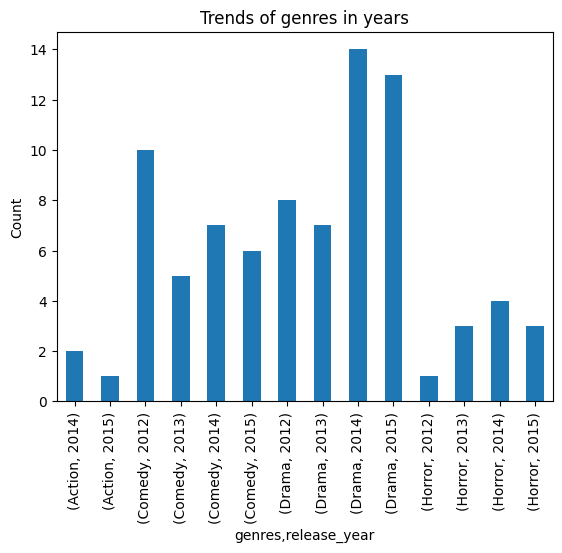

In [120]:
trends.plot(kind = 'bar');
plt.ylabel("Count")
plt.title("Trends of genres in years");


Drama is the prominent genre as shown by the bar graph above

Below, we try to see the budget for each production company for drama
from 2012 to 2015

In [121]:
prodco_budget_rev = df[df['genres']=='Drama'].query(" production_companies in {} &  release_year >= {} ".format('production_companies',2012)) \
                                .groupby(["production_companies","release_year"]).sum() 
prodco_budget_rev.budget

/var/folders/33/05xv_7c529v7tfzv6r8j9t4h0000gn/T/ipykernel_41642/2724225269.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  .groupby(["production_companies","release_year"]).sum()


production_companies                                                                                                                            release_year
Amazon Studios|Film Art Media|Apollo Media                                                                                                      2015            11930000
Animus Films|Edward R. Pressman Film|Kreo Films FZ|Xeitgeist Entertainment Group|American Entertainment Investors                               2015                   0
BBC Films|Origin Pictures                                                                                                                       2015            11000000
Centropolis Entertainment|Mel's Cite du Cinema                                                                                                  2015            13500000
Cross Creek Pictures|Vertebra Films                                                                                                             2012                   

Let us see the maximum budget for drama

In [122]:
prodco_budget_rev.budget.max()

50000000

500 000 is the maximum budget for drama in the recent times by Warner Bros


Let us now plot the budget for each production companies

Text(0, 0.5, 'budget')

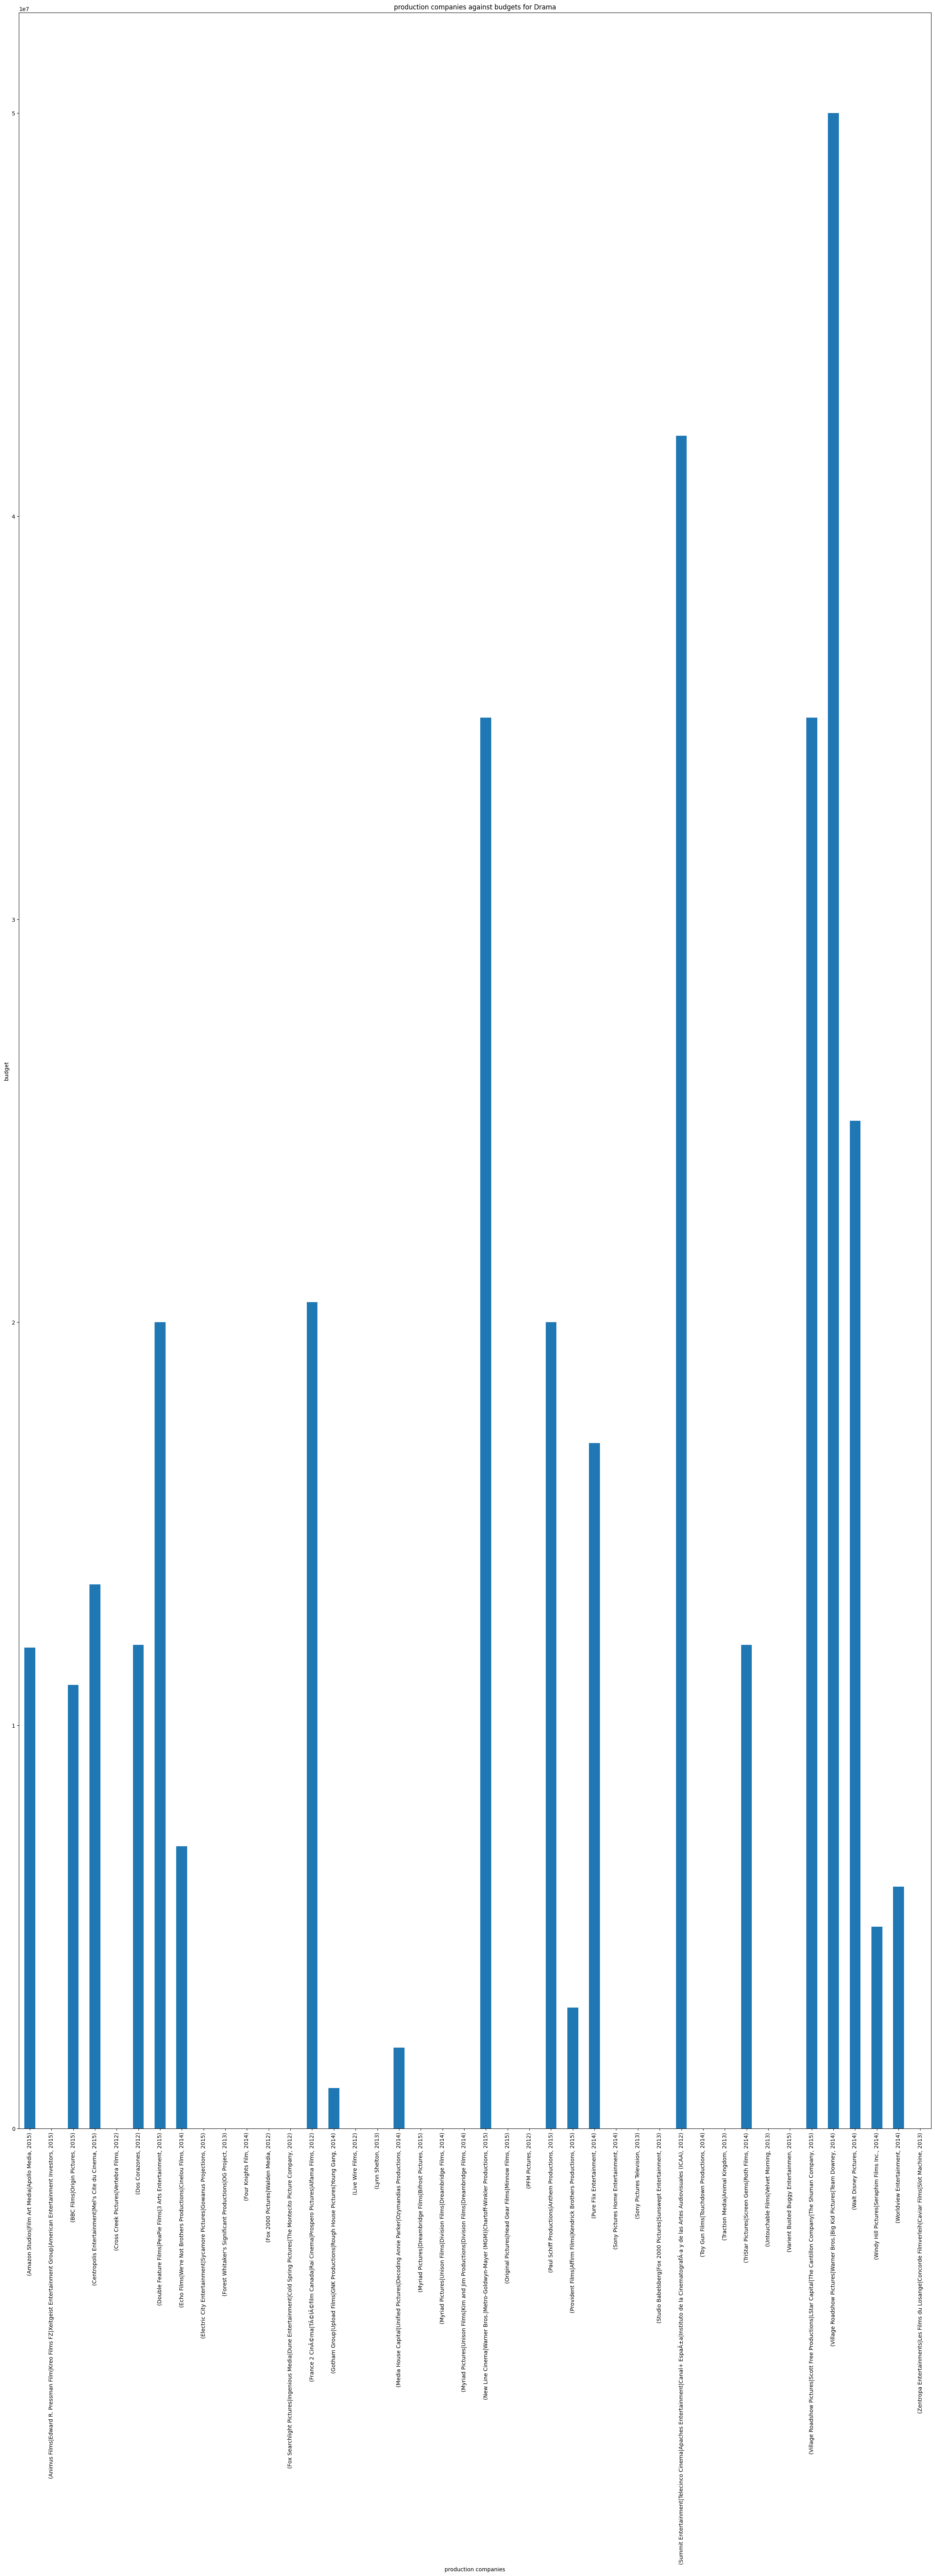

In [123]:
#ploting bar graph
prodco_budget_rev.budget.plot(kind = 'bar', figsize = (30, 70));
plt.title('production companies against budgets for Drama');
plt.xlabel('production companies');
plt.ylabel('budget')

Now we do the same for revenue

In [124]:
#get the production company and revenue
prodco_budget_rev.revenue

production_companies                                                                                                                            release_year
Amazon Studios|Film Art Media|Apollo Media                                                                                                      2015             18340000
Animus Films|Edward R. Pressman Film|Kreo Films FZ|Xeitgeist Entertainment Group|American Entertainment Investors                               2015             11472454
BBC Films|Origin Pictures                                                                                                                       2015             61619773
Centropolis Entertainment|Mel's Cite du Cinema                                                                                                  2015               187674
Cross Creek Pictures|Vertebra Films                                                                                                             2012               

In [125]:
#maximum revenue
prodco_budget_rev.revenue.max()

180274123

maximum revenue is 180274123 by Amazon Studios

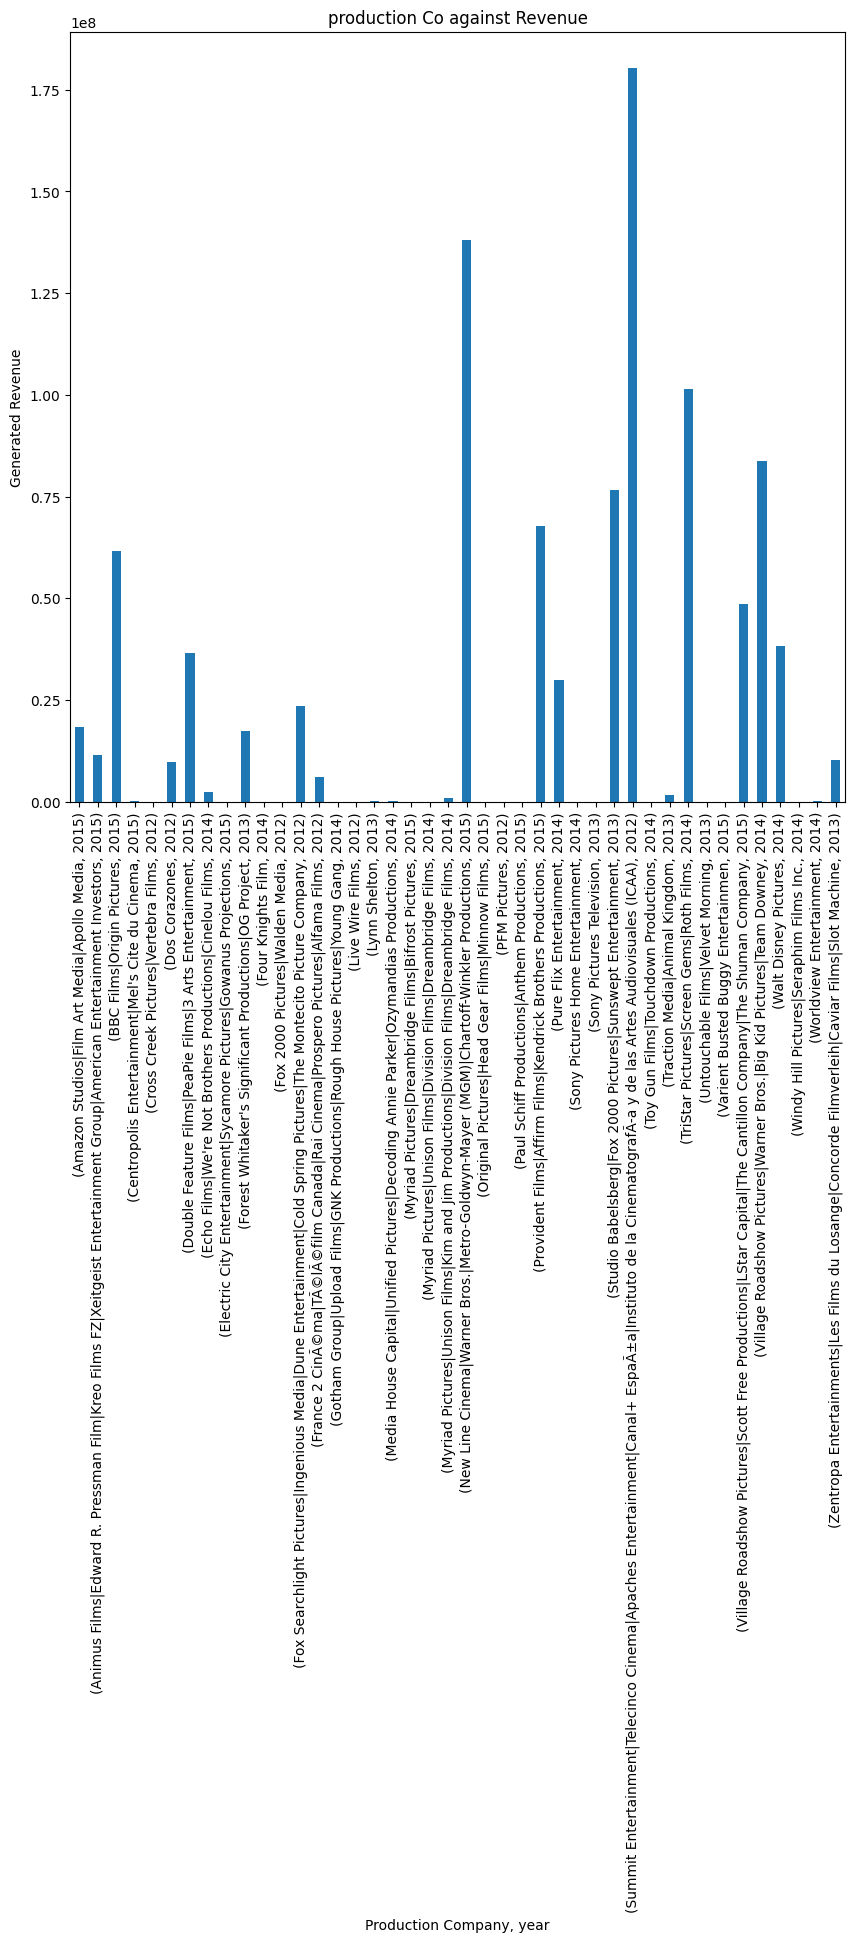

In [126]:
#plotting production co and revenue
prodco_budget_rev.revenue.plot(kind = 'bar', figsize = (10, 10));
plt.title('production Co against Revenue');
plt.xlabel('Production Company, year');
plt.ylabel('Generated Revenue');

Let us observe how each production company has gained vote count from 2012

In [127]:
prodco_budget_rev.vote_count

production_companies                                                                                                                            release_year
Amazon Studios|Film Art Media|Apollo Media                                                                                                      2015             197
Animus Films|Edward R. Pressman Film|Kreo Films FZ|Xeitgeist Entertainment Group|American Entertainment Investors                               2015             104
BBC Films|Origin Pictures                                                                                                                       2015             277
Centropolis Entertainment|Mel's Cite du Cinema                                                                                                  2015              14
Cross Creek Pictures|Vertebra Films                                                                                                             2012              33
Dos Corazones     

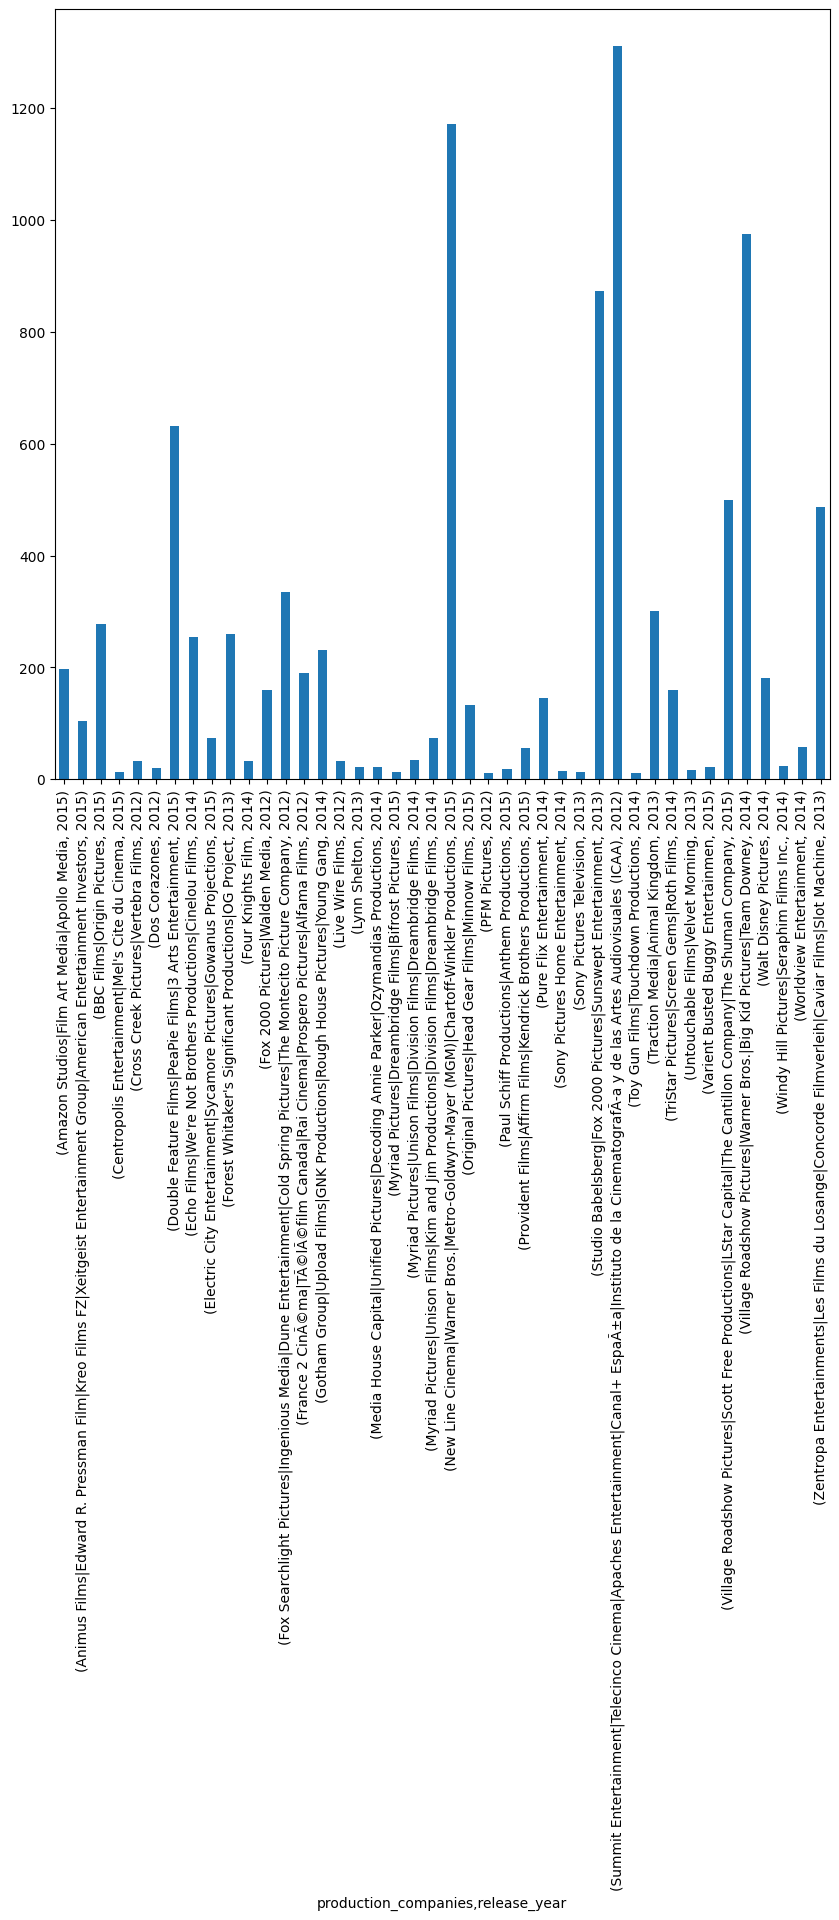

In [128]:
prodco_budget_rev.vote_count.plot(kind = 'bar', figsize = (10, 10));

In [133]:
# max rev
prodco_budget_rev.vote_count.max()

1310

max vote count received was 1310

Do the same for vote average

In [130]:
prodco_budget_rev.vote_average

production_companies                                                                                                                            release_year
Amazon Studios|Film Art Media|Apollo Media                                                                                                      2015            6.9
Animus Films|Edward R. Pressman Film|Kreo Films FZ|Xeitgeist Entertainment Group|American Entertainment Investors                               2015            7.1
BBC Films|Origin Pictures                                                                                                                       2015            7.3
Centropolis Entertainment|Mel's Cite du Cinema                                                                                                  2015            5.6
Cross Creek Pictures|Vertebra Films                                                                                                             2012            5.5
Dos Corazones          

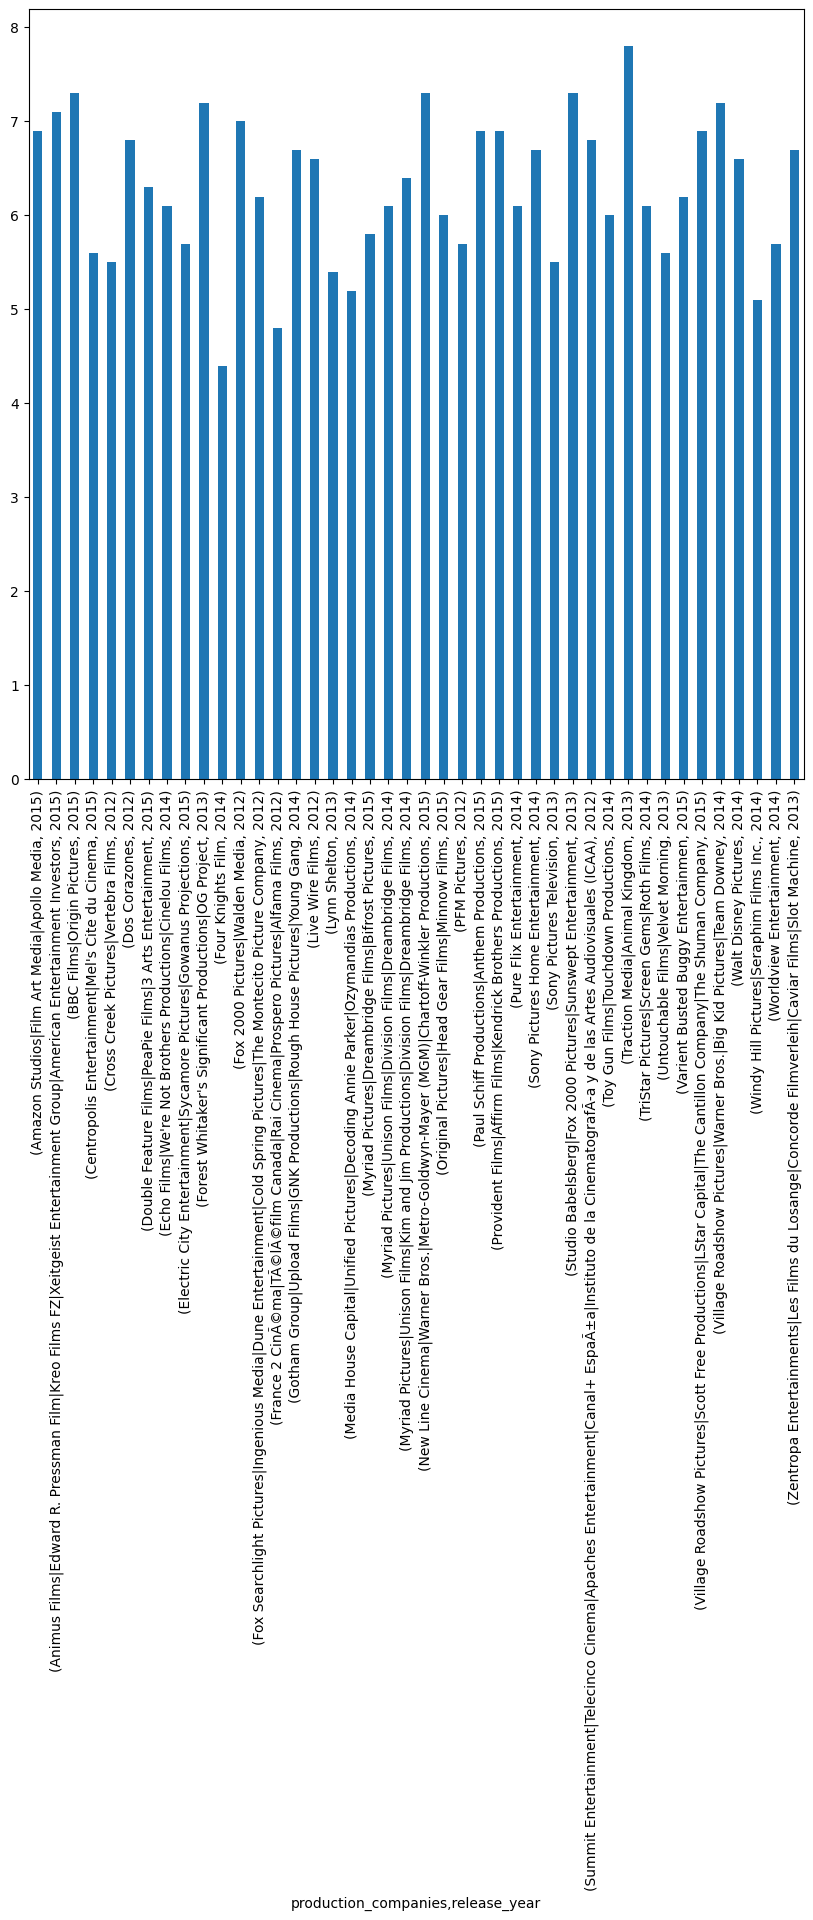

In [131]:
prodco_budget_rev.vote_average.plot(kind = 'bar', figsize = (10, 10));

In [132]:
prodco_budget_rev.vote_average.max()

7.8

Maximum vote average was 7.8

Summary
1) The dataset used, TMDB, has movie insites spanning from 1962 to 2015.
2) In te data wrangling phase, we can easily see that the dataset comes in a clean format, with all values comma seperated; this enables straight forward reading of the data.
3) From the column histographs, we get to observe the various distributions that help us make sense of the data, e.g the normal distribution of vote average
4) Trends in number of movies released per year are seen to increase in recent times, and drama is the most popular genre; this insight should help production companies in observing that an increased budget usually results in an increased popularity, and in turn increased revenue. Thus, production companies should focus more on the genres that bring good profit, and also a good vote average. This can be directly inferred from the economics plots as well as the correlation between different values and the popularity of the movies
5) The data was cleaned by removing null values
6) Vectorization was used to split string values in each column
7) There were some missing values

Limitations

1) From the plots, general pattern inferences can be made to make the right predictions and decisons about the performance of a movie with a specific runtime by a specific production company and in a certain year. However, this is not enough for accurate predictions, as there are many factors at play. Machine learning tools could improve that.
2) Some movies have zero values for columns that should never be zero, e.g the Cristiano Ronaldo movie has zero runtime and a couple of movies have zero revenue and budget, which does not make any sense. In my opionion, this information could be added to the dataset, say by scraping through some website such as the IMDB website for such info. This missing Information seems to be misleading when trying to see trends and make predictions based on the trends.

References
Pandas: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.query.html
Udacity Introduction to Data Science: https://learn.udacity.com/nanodegrees/nd002-alg-t2/parts/49e2f932-927a-4de3-a611-f92291383095/lessons/ls0526/concepts/ls0526-submit-project